In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install gdown

In [3]:
import gdown

download_link = f'https://drive.google.com/uc?id=1FD6OKhqwygBZC_Xhyj3SVx0q0PbQPTx4'
gdown.download(download_link, 'dataset.zip', quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1FD6OKhqwygBZC_Xhyj3SVx0q0PbQPTx4
From (redirected): https://drive.google.com/uc?id=1FD6OKhqwygBZC_Xhyj3SVx0q0PbQPTx4&confirm=t&uuid=9edb73b9-59e5-455a-8dee-391611d5ea94
To: /kaggle/working/dataset.zip
100%|██████████| 88.4M/88.4M [00:00<00:00, 301MB/s]


'dataset.zip'

In [4]:
!unzip "/kaggle/working/dataset.zip"

Archive:  /kaggle/working/dataset.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/1073.jpeg  
  inflating: dataset/test/1090.jpeg  
  inflating: dataset/test/1132.jpeg  
  inflating: dataset/test/1133.jpeg  
  inflating: dataset/test/1153.jpeg  
  inflating: dataset/test/12.png     
  inflating: dataset/test/122.jpeg   
  inflating: dataset/test/1222.jpeg  
  inflating: dataset/test/1266.jpeg  
  inflating: dataset/test/1287.jpeg  
  inflating: dataset/test/1335.jpeg  
  inflating: dataset/test/134.jpeg   
  inflating: dataset/test/1348.jpeg  
  inflating: dataset/test/1411.jpeg  
  inflating: dataset/test/1413.jpeg  
  inflating: dataset/test/1415.jpeg  
  inflating: dataset/test/1423.jpeg  
  inflating: dataset/test/1444.jpeg  
  inflating: dataset/test/1455.jpeg  
  inflating: dataset/test/1463.jpeg  
  inflating: dataset/test/1470.jpeg  
  inflating: dataset/test/1477.jpeg  
  inflating: dataset/test/1521.jpeg  
  inflating: dataset/test/1526.jpeg  
 

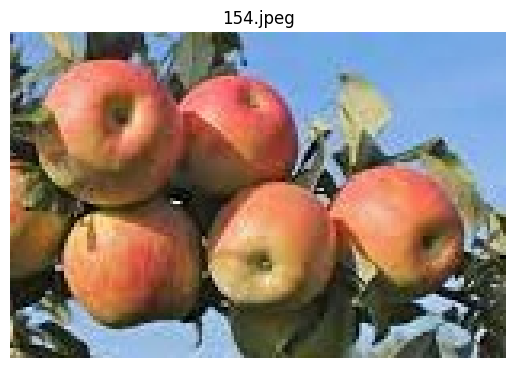

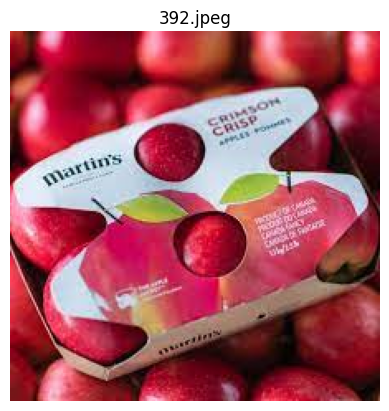

In [5]:
import os
import random  
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "/kaggle/working/dataset/train"
def plot_images(directory, num_samples=2):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    selected_images = random.sample(image_files, num_samples)
    for img_name in selected_images:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)      
        # Display the image
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')
        plt.show()

plot_images(os.path.join(dataset_path, '1'))

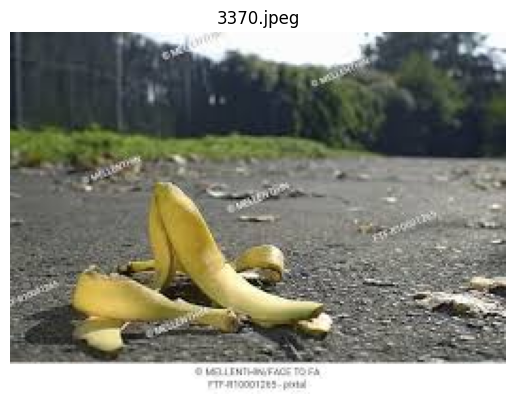

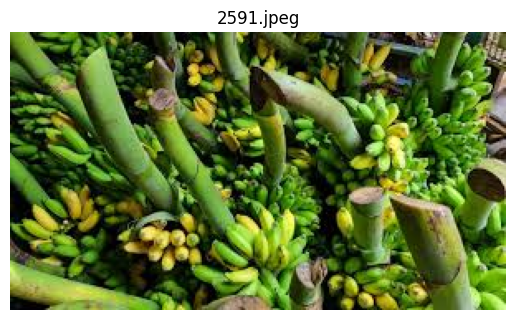

In [6]:
plot_images(os.path.join(dataset_path, '2'))

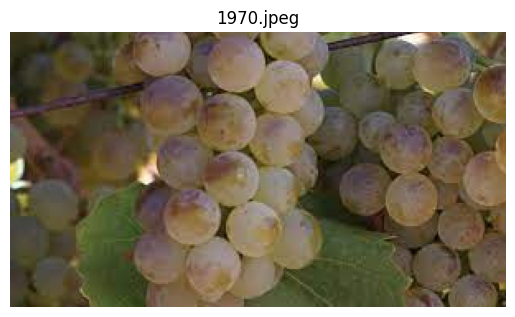

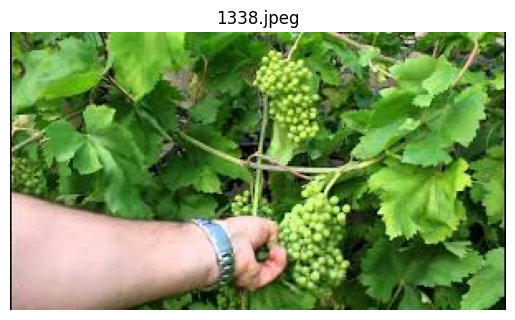

In [7]:
plot_images(os.path.join(dataset_path, '3'))

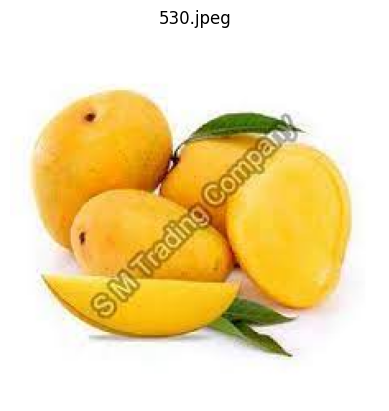

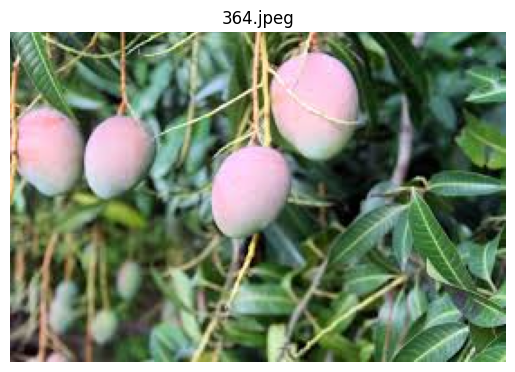

In [8]:
plot_images(os.path.join(dataset_path, '4'))

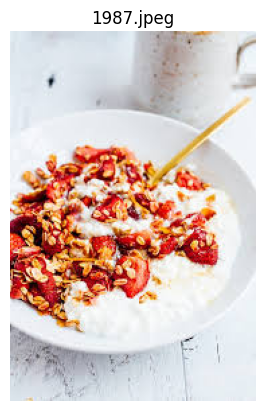

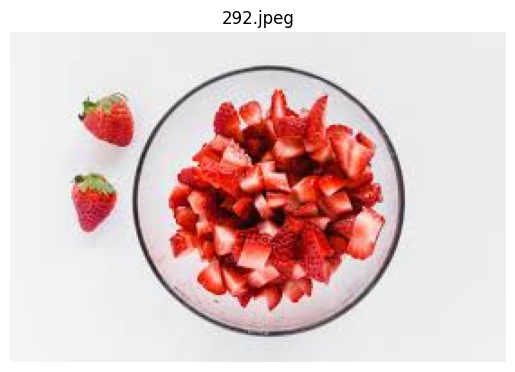

In [9]:
plot_images(os.path.join(dataset_path, '5'))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

# Image dimensions
img_height, img_width = 227, 227
input_shape = (img_height, img_width, 3)

# Batch size and number of epochs
batch_size = 32
epochs = 50  

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Data generator for training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_datagen = ImageDataGenerator(validation_split=0.2)
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the AlexNet model
model = models.Sequential()

# Layer 1
model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
model.add(layers.Conv2D(256, (5, 5), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
model.add(layers.Conv2D(384, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Layer 4
model.add(layers.Conv2D(384, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Layer 5
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(4096))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f"Validation Accuracy: {accuracy}")

Found 7920 images belonging to 5 classes.
Found 1980 images belonging to 5 classes.
Epoch 1/50
248/248 [==============================] - 504s 2s/step - loss: 1.7408 - accuracy: 0.4229 - val_loss: 2.7350 - val_accuracy: 0.3146
Epoch 2/50
248/248 [==============================] - 502s 2s/step - loss: 1.4234 - accuracy: 0.4885 - val_loss: 2.5342 - val_accuracy: 0.4015
Epoch 3/50
248/248 [==============================] - 502s 2s/step - loss: 1.3925 - accuracy: 0.5145 - val_loss: 2.1246 - val_accuracy: 0.4742
Epoch 4/50
248/248 [==============================] - 501s 2s/step - loss: 1.2716 - accuracy: 0.5492 - val_loss: 1.9462 - val_accuracy: 0.3414
Epoch 5/50
248/248 [==============================] - 500s 2s/step - loss: 1.2643 - accuracy: 0.5643 - val_loss: 2.2086 - val_accuracy: 0.4384
Epoch 6/50
248/248 [==============================] - 501s 2s/step - loss: 1.3011 - accuracy: 0.5499 - val_loss: 1.9269 - val_accuracy: 0.4737
Epoch 7/50
248/248 [==============================] - 502s

In [ ]:
# Save the model
model.save('model')